# Part I: Parametric econometric models

This study develops several architectural features, housing furniture and facilities conditions to explain the house prices over past 5 years from 2006 to 2010 in Ames, American. The linear regression model is employed in this study to assess the impacts of both quantitative and qualitative factors in the housing prices sectors. In conclusion, the model suggests that the house price in Ames was triggered by housing surface, the quality of estate and the its location.

Our source of data for Housing Price and its determinants was first built and introduced by Dean De Cock in his publication paper in Journal of Statistics Education which is available in Kaggle – one of the most famous data science network. This database, including 95 variables and 2921 observations, was based on the Ames City Assessor’s Office database, which contained initially 113 variables describing 3970 property sales.

In [2]:
# Importing the dataset
AmesHousing <- read.table("homework-M2-EBDS-HOANGDucThang-data.txt.txt")

In [34]:
# Checking its dimension
dim(AmesHousing)

[1] 2921   95

In this project, in order to assess the impact of microeconomic factors on housing price determination, instead of considering all factors coming from the original database, we selected several variables which are listed and defined below:
- **lSalePrice (dependent variable)**: logarithm of Housing Price.
- **GrLivArea**: Above grade (ground) living area square feet.
- **GarageArea**: Size of garage in square feet.
- **OverallQual**: Rates the overall material and finish of the house (scale of 10 to represent the quality of the house from Very Poor, Poor, Fair, Below Average, Average, Above Average, Good, Very Good, Excellent, Very Excellent, respectively).
- **YearBuilt**: Original construction date.
- **MSZoning_FV, MSZoning_RH, MSZoning_RM, MSZoning_RL, other**: Dummy variables represent the general zoning classification of the sale (Floating Village Residential, Residential High Density, Residential Medium Density, Residential Low Density and other).

In [3]:
attach(AmesHousing)
X = cbind(lSalePrice, GrLivArea, GarageArea, OverallQual, YearBuilt, MSZoning_FV, MSZoning_RH, MSZoning_RM, MSZoning_RL)

In [4]:
#Descriptive statistics
summary(X)

   lSalePrice      GrLivArea      GarageArea      OverallQual    
 Min.   :10.46   Min.   : 334   Min.   :   0.0   Min.   : 1.000  
 1st Qu.:11.77   1st Qu.:1126   1st Qu.: 320.0   1st Qu.: 5.000  
 Median :11.98   Median :1441   Median : 480.0   Median : 6.000  
 Mean   :12.02   Mean   :1495   Mean   : 472.1   Mean   : 6.093  
 3rd Qu.:12.27   3rd Qu.:1740   3rd Qu.: 576.0   3rd Qu.: 7.000  
 Max.   :13.53   Max.   :4476   Max.   :1488.0   Max.   :10.000  
   YearBuilt     MSZoning_FV       MSZoning_RH        MSZoning_RM    
 Min.   :1872   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.:1954   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median :1973   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   :1971   Mean   :0.04759   Mean   :0.008901   Mean   :0.1571  
 3rd Qu.:2001   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.0000  
 Max.   :2010   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
  MSZoning_RL    
 Min.   :0.0000  
 1st Qu.:1.0

The model of this study is specified as:

$lSalePrice_i = b_0 + b_1 \times GrLivArea_i + b_2 \times GarageArea_i + b_3 \times OverallQual_i + b_4 \times YearBuilt_i + b_5 \times MSZoningFV_i + b_6 \times MSZoningRH_i + b_7 \times MSZoningRM_i + b_8 \times MSZoningRL_i + u_i$ 

Here, $i$ is index of housing, $u_i$ is an error term. 

The model makes the following assumptions: 
- **H1**. The model is correctly specified and is linear in parameters. 
- **H2**. Homoscedasticity of error term: $var(u_i|X) = \sigma ^2 $ for any $i \in$ {1, 2, …, 2921}.
- **H3**. Non autocorrelation of error term: $cov(u_i, u_j|X) = 0$ for any $i \neq j$.
- **H4**. Exogeneity of regressor: $E(u_i|X) = 0$  for any $i \in$ {1, 2, …, 2921}.
- **H5**. There is no strict multicollinearity among explanatory variables.

OLS estimation is unbiased and consistent if assumptions **H1-H5** are satisfied given that our sample size is large enough. In the first part of this study, we only focus on finding the linear relationship among our variables by using OLS estimation.


In [5]:
#Estimating the Linear model
linear <- lm(lSalePrice~GrLivArea+GarageArea+OverallQual+YearBuilt+MSZoning_FV+MSZoning_RH+MSZoning_RM+MSZoning_RL)
summary(linear)


Call:
lm(formula = lSalePrice ~ GrLivArea + GarageArea + OverallQual + 
    YearBuilt + MSZoning_FV + MSZoning_RH + MSZoning_RM + MSZoning_RL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01609 -0.08904  0.00603  0.09543  0.74994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.226e+00  2.587e-01  24.066  < 2e-16 ***
GrLivArea   2.857e-04  7.592e-06  37.638  < 2e-16 ***
GarageArea  2.914e-04  1.752e-05  16.630  < 2e-16 ***
OverallQual 1.193e-01  3.178e-03  37.534  < 2e-16 ***
YearBuilt   2.151e-03  1.362e-04  15.792  < 2e-16 ***
MSZoning_FV 2.446e-01  3.383e-02   7.231 6.10e-13 ***
MSZoning_RH 1.860e-01  4.278e-02   4.348 1.42e-05 ***
MSZoning_RM 1.667e-01  3.067e-02   5.437 5.87e-08 ***
MSZoning_RL 2.895e-01  3.044e-02   9.511  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1563 on 2912 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8489 
F-statistic:

As can be seen, the linear model shows the high R-squared value (over 84%) which indicates that all chosen variables contribute reliably in explaining more than 84% of housing prices. As the results, all explanatory variables in our models are significantly and positively correlated with lSalePrice.

The estimated intercept represents the average impact of houses in other zone on its price, more precisely, the house in other zone (out of listed 4 zones mentionned above) cost in average $e^{6.226}$

The coefficient of GrLivArea allows to confirm that the house surface is more prone to house price escalation. A house with additional of ten square feet surface will be evaluated with higher price of 0.29%. This coefficient is quite reasonable while housing surface area is one of the factors which directly influence the house evaluation.

The coefficient of GarageArea in our model is 2.914e-04: the larger car parking capacity is, the higher house price is. 

Overall housing architecture quality (OverallQual) as predicted is positively associated with the magnitude of house prices. A house which is evaluated with additional 1 point faces a greater price of 11.9%. It is consistent to the common argument that housing buyers are normally interested in the architecture and the structure conditions of a house to decide which price they can pay for.

YearBuilt level itself is positively linked to house prices, though the coefficient is negligibly small. As can be seen, a house built in later 1 year has higher price of 0.215%. This leaves that YearBuilt may not be an important selection criterion in pricing a house.

In this model, we run also with several dummy variables of housing zone. As predicted, the house located in Low Density or Floating Village Residential zone is appreciated in higher price.

# Part II: Non-parametric econometric models

This part is devoted for a non - parametric model:

$lSalePrice = b_0 + b_1 \times GrLivArea + b_2 \times GarageArea + b_3 \times OverallQual + b_4 \times YearBuilt + b_5 \times MSZoningFV + b_6 \times MSZoningRH + b_7 \times MSZoningRM + b_8 \times MSZoningRL + m_1(GrLivArea) + m_2(GarageArea) + m_3(OverallQual) + m_4(YearBuilt) + u$ 

This model is also known as a partially linear model. We also note that a nonlinear transformation of a dummy variable is still a dummy.

Spatial dependence is specified nonparametrically rather than with standard parametric models (spatial autocorrelation models).


In [6]:
#Processing GAM model
library(mgcv)
gam1 <- gam(lSalePrice~GrLivArea+GarageArea+OverallQual+YearBuilt+MSZoning_FV+MSZoning_RH+MSZoning_RM+MSZoning_RL+s(GrLivArea)+s(GarageArea)+s(OverallQual)+s(YearBuilt))
summary(gam1)

Loading required package: nlme
This is mgcv 1.8-25. For overview type 'help("mgcv-package")'.



Family: gaussian 
Link function: identity 

Formula:
lSalePrice ~ GrLivArea + GarageArea + OverallQual + YearBuilt + 
    MSZoning_FV + MSZoning_RH + MSZoning_RM + MSZoning_RL + s(GrLivArea) + 
    s(GarageArea) + s(OverallQual) + s(YearBuilt)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0012299  0.0014812  -0.830 0.406405    
GrLivArea    0.0004178  0.0001043   4.006 6.34e-05 ***
GarageArea   0.0001715  0.0001565   1.096 0.273022    
OverallQual  0.0870273  0.0196815   4.422 1.02e-05 ***
YearBuilt    0.0053519  0.0001021  52.434  < 2e-16 ***
MSZoning_FV  0.2136550  0.0341107   6.264 4.32e-10 ***
MSZoning_RH  0.1590629  0.0427489   3.721 0.000202 ***
MSZoning_RM  0.1422255  0.0309752   4.592 4.59e-06 ***
MSZoning_RL  0.2612437  0.0311058   8.399  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F p-value    
s(GrLivArea)   6.300  

From these results, we can make standard interpretations:

In overall, positive relationships among houses' determining factors such as its surface, facilities and architecture with its price are also found in the GAM estimation. However, compared with the previous model, the estimations of intercept and garage capacity are no longer significant.

Furthermore, the rejection of the alternative hypothesis of OverallQual, YearBuilt at 1% and GrLivArea at 5% confirms that these factors tend to be non-linear.

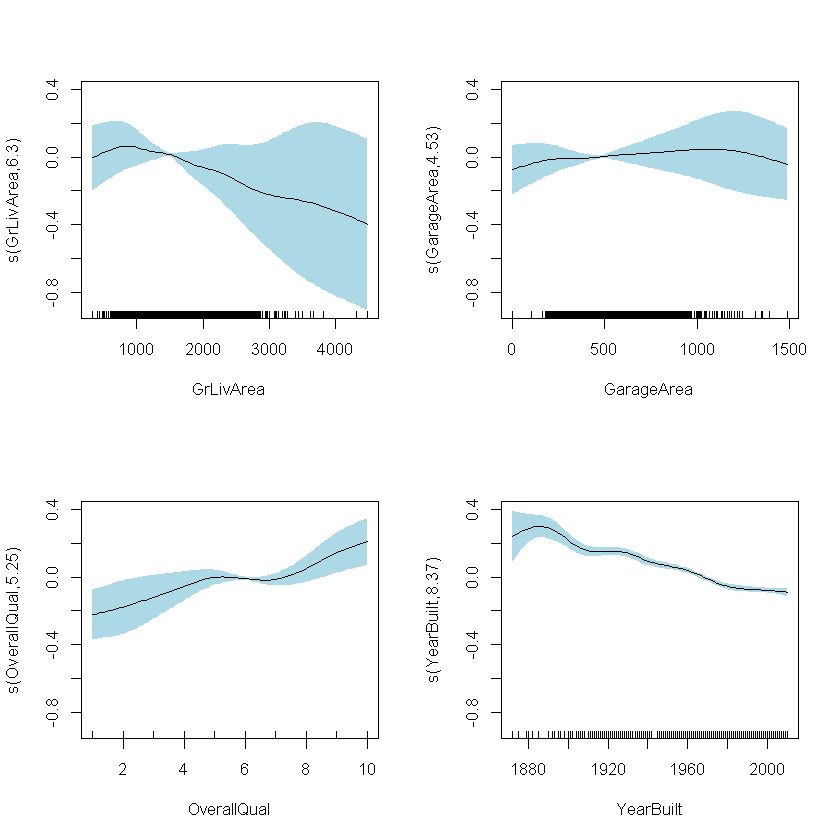

In [7]:
par(mfrow = c(2,2))
plot(gam1, shade = T, shade.col = 'lightblue')

As can be seen on these plots, only GarageArea exhibit nearly a line (linear) in its relationship with the housing price.

# Part III: Compare the results between the two approaches

Obviously, GAM model results a better estimated R_square which indicate that GAM model is better that the previous one. However, through the figures illustrating the non linearities relationship between these variables and dependent variable, it can be seen that these non-linearity are not strong while its have negligible impact on improving R_square.

As can be seen on these above plots of non-linear relationships in GAM model, we suggest that Piece liner model can be used with knots in implementing a better parametric model. Therefore, we can make inference as below:

$m_1(GrLivArea) = \gamma_1 \times GrLivArea + \gamma_2 \times (GrLivArea - 900)_+ $

$m_3(OverallQual) = \theta_1 \times OverallQual + \theta_2 \times (OverallQual - 5)_+ + \theta_3 \times (OverallQual - 7)_+$

$m_4(YearBuilt) = \eta_1 \times YearBuilt + \eta_2 \times (YearBuilt - 1882)_+ $

In [25]:
linear2 <- lm(lSalePrice~GrLivArea+GarageArea+OverallQual+YearBuilt+MSZoning_FV+MSZoning_RH+MSZoning_RM+MSZoning_RL
              +(GrLivArea >= 900)*GrLivArea+(OverallQual >= 5)*OverallQual+(OverallQual >= 7)*OverallQual+(YearBuilt >= 1882)*YearBuilt)
summary(linear2)


Call:
lm(formula = lSalePrice ~ GrLivArea + GarageArea + OverallQual + 
    YearBuilt + MSZoning_FV + MSZoning_RH + MSZoning_RM + MSZoning_RL + 
    (GrLivArea >= 900) * GrLivArea + (OverallQual >= 5) * OverallQual + 
    (OverallQual >= 7) * OverallQual + (YearBuilt >= 1882) * 
    YearBuilt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05372 -0.08153  0.00190  0.08895  0.71476 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -6.908e+01  3.577e+01  -1.931 0.053528 .  
GrLivArea                         5.714e-04  1.114e-04   5.129 3.10e-07 ***
GarageArea                        2.669e-04  1.750e-05  15.258  < 2e-16 ***
OverallQual                       1.450e-01  1.735e-02   8.358  < 2e-16 ***
YearBuilt                         4.206e-02  1.904e-02   2.209 0.027274 *  
MSZoning_FV                       2.289e-01  3.390e-02   6.752 1.75e-11 ***
MSZoning_RH                       1.628e-01  4.264e-0

As can be seen, this model has improved slightly R_square and all estimations are significant except the intercept. The precise explanation is represented as below: 
- For the house with its surface under 900 sqft, while its surface increase 10%, its price increase also 0.057% on average. However, for the larger houses with its surface over 900 sqft, 10% increase in surfaces leads to 26.9% on average in its price. 
- In term of Overall quality of house (OverallQual), it's divided into 3 groups:
        + From 1 - 4: Coefficient is 0.145
        + From 5 - 7: Coefficient is 0/4677
        + Over 7 : Coefficient is -0.1152
- In term of year built, the house built before 1982 has much lower effect on price (0.042) than the newer houses built after 1982 (74.6)

In the following part, we consider the interaction between OverallQual and YearBuilt in the non-linear component. The model is below:

In [27]:
gam2 <- gam(lSalePrice~GrLivArea+GarageArea+OverallQual+YearBuilt+MSZoning_FV+MSZoning_RH+MSZoning_RM+MSZoning_RL+s(GrLivArea)+s(OverallQual, YearBuilt))
summary(gam2)


Family: gaussian 
Link function: identity 

Formula:
lSalePrice ~ GrLivArea + GarageArea + OverallQual + YearBuilt + 
    MSZoning_FV + MSZoning_RH + MSZoning_RM + MSZoning_RL + s(GrLivArea) + 
    s(OverallQual, YearBuilt)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.959e-04  7.753e-04  -1.026    0.305    
GrLivArea    5.177e-04  1.005e-04   5.150 2.78e-07 ***
GarageArea   2.706e-04  1.762e-05  15.363  < 2e-16 ***
OverallQual  7.471e-02  3.372e-03  22.155  < 2e-16 ***
YearBuilt    5.286e-03  7.752e-05  68.186  < 2e-16 ***
MSZoning_FV  2.176e-01  3.419e-02   6.366 2.25e-10 ***
MSZoning_RH  1.703e-01  4.292e-02   3.967 7.46e-05 ***
MSZoning_RM  1.559e-01  3.117e-02   5.000 6.07e-07 ***
MSZoning_RL  2.697e-01  3.118e-02   8.650  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                            edf Ref.df      F p-value    
s(GrLivArea)              6.233

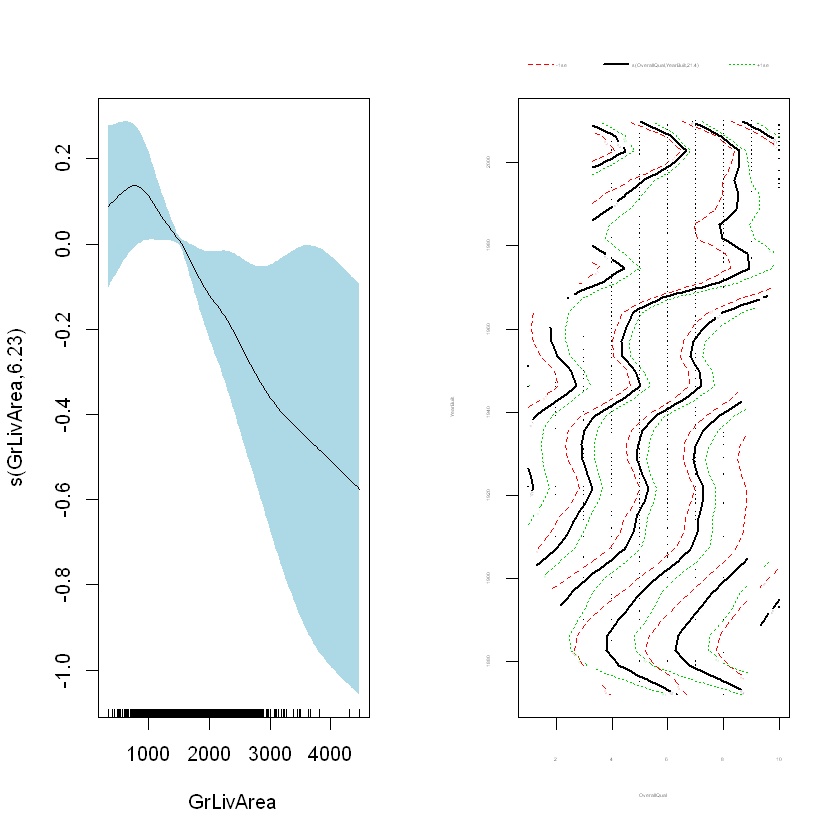

In [29]:
par(mfrow = c(1,2))
plot(gam2, shade = T, shade.col = 'lightblue')

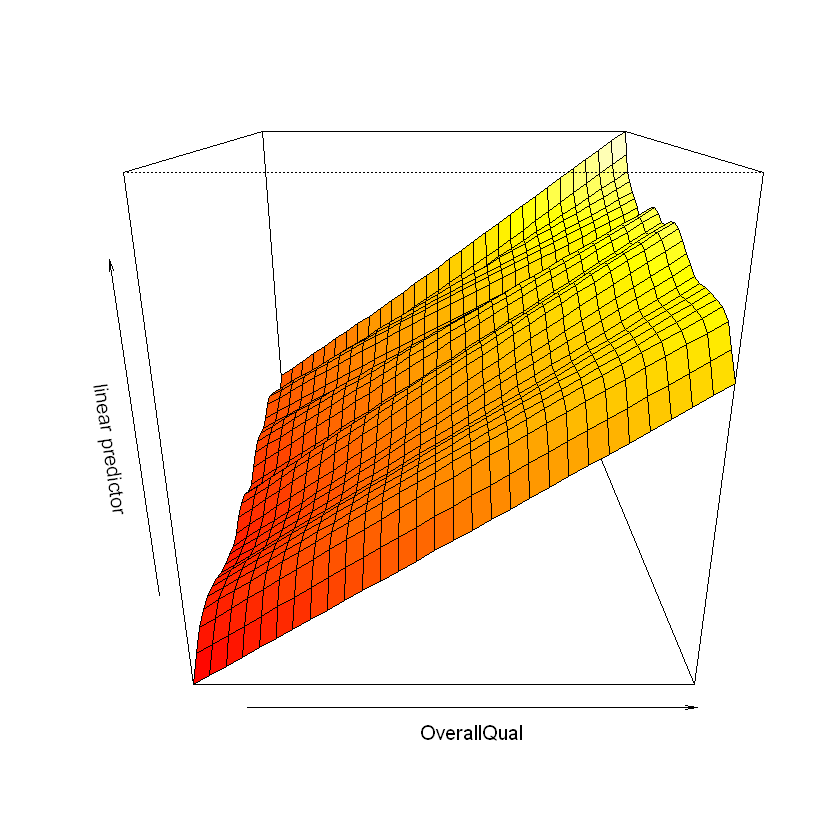

In [30]:
vis.gam(gam2, view = c('OverallQual', 'YearBuilt'), phi = 20)

In general, this model shares the same patterns with its previous ones in the significancy of estimated coefficients and high R_squares (high power of explanation of explaining variables). Despite the rejection of H0 in linearity in GrLivArea and the interactive relation betweeen OverallQual and YearBuilt, we found that these non-linearity is not much strong while the last figure shows that the relationship between these variables nearly a surface. Therefore, the piece linear model is a better candidate to illustrate the impact of houses' characters on its price.